In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('D:\\AI_DataScience\\Data\\final_data.csv')

In [3]:
df.head()

,GAME_ID,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CITY,HOME_TEAM,MIN,FGM,FGA,FG_PCT,...,TO,PF,PTS,PLUS_MINUS,EFG_PCT,PIE,COVID_FLAG,RESULT,SEASON,WIN_PCT
0,21200001,1610612764,Wizards,WAS,Washington,Cavaliers,240:00,32,90,0.356,...,12,19,84,-10,0.32,42.60,0,0,12,0.0
1,21200001,1610612739,Cavaliers,CLE,Cleveland,Cavaliers,240:00,36,79,0.456,...,20,21,94,10,0.36,57.40,0,1,12,100.0
2,21200002,1610612748,Heat,MIA,Miami,Heat,240:00,43,79,0.544,...,8,20,120,13,0.43,55.74,0,1,12,100.0
3,21200002,1610612738,Celtics,BOS,Boston,Heat,240:00,39,75,0.520,...,15,23,107,-13,0.39,44.26,0,0,12,0.0
4,21200003,1610612747,Lakers,LAL,Los Angeles,Lakers,240:00,38,77,0.494,...,14,21,91,-8,0.38,45.39,0,0,12,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31340 entries, 0 to 31339
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GAME_ID            31340 non-null  int64  
 1   TEAM_ID            31340 non-null  int64  
 2   TEAM_NAME          31340 non-null  object 
 3   TEAM_ABBREVIATION  31340 non-null  object 
 4   TEAM_CITY          31340 non-null  object 
 5   HOME_TEAM          31330 non-null  object 
 6   MIN                31340 non-null  object 
 7   FGM                31340 non-null  int64  
 8   FGA                31340 non-null  int64  
 9   FG_PCT             31340 non-null  float64
 10  FG3M               31340 non-null  int64  
 11  FG3A               31340 non-null  int64  
 12  FG3_PCT            31340 non-null  float64
 13  FTM                31340 non-null  int64  
 14  FTA                31340 non-null  int64  
 15  FT_PCT             31340 non-null  float64
 16  OREB               313

In [5]:
df.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_NAME', 'TEAM_ABBREVIATION', 'TEAM_CITY',
       'HOME_TEAM', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TO', 'PF', 'PTS', 'PLUS_MINUS', 'EFG_PCT', 'PIE', 'COVID_FLAG',
       'RESULT', 'SEASON', 'WIN_PCT'],
      dtype='object')

In [6]:
Obj = df.select_dtypes(include='object')
Obj

,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CITY,HOME_TEAM,MIN
0,Wizards,WAS,Washington,Cavaliers,240:00
1,Cavaliers,CLE,Cleveland,Cavaliers,240:00
2,Heat,MIA,Miami,Heat,240:00
3,Celtics,BOS,Boston,Heat,240:00
4,Lakers,LAL,Los Angeles,Lakers,240:00
...,...,...,...,...,...
31335,Mavericks,DAL,Dallas,Warriors,240:00
31336,Bucks,MIL,Milwaukee,Bucks,240:00
31337,Hawks,ATL,Atlanta,Bucks,240:00
31338,Thunder,OKC,Oklahoma City,Thunder,240:00


In [7]:
le=LabelEncoder()
categogy=['TEAM_NAME','TEAM_ABBREVIATION','TEAM_CITY','HOME_TEAM','MIN']
for col in categogy:
    df[col]=le.fit_transform(df[col])
df

,GAME_ID,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CITY,HOME_TEAM,MIN,FGM,FGA,FG_PCT,...,TO,PF,PTS,PLUS_MINUS,EFG_PCT,PIE,COVID_FLAG,RESULT,SEASON,WIN_PCT
0,21200001,1610612764,30,30,29,4,0,32,90,0.356,...,12,19,84,-10,0.32,42.60,0,0,12,0.000000
1,21200001,1610612739,4,5,5,4,0,36,79,0.456,...,20,21,94,10,0.36,57.40,0,1,12,100.000000
2,21200002,1610612748,9,15,15,9,0,43,79,0.544,...,8,20,120,13,0.43,55.74,0,1,12,100.000000
3,21200002,1610612738,5,2,1,9,0,39,75,0.520,...,15,23,107,-13,0.39,44.26,0,0,12,0.000000
4,21200003,1610612747,14,13,13,14,0,38,77,0.494,...,14,21,91,-8,0.38,45.39,0,0,12,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31335,22401228,1610612742,16,6,6,29,0,52,87,0.598,...,15,12,143,10,0.52,56.23,0,1,24,47.560976
31336,22401229,1610612749,2,16,16,2,0,39,86,0.453,...,12,27,110,8,0.39,55.46,0,1,24,58.536585
31337,22401229,1610612737,8,0,0,2,0,35,82,0.427,...,13,20,102,-8,0.35,44.54,0,0,24,48.780488
31338,22401230,1610612760,26,21,20,26,0,36,80,0.450,...,12,24,111,15,0.36,67.33,0,1,24,82.926829


In [8]:
X=df.drop('RESULT',axis=1)
y=df['RESULT']

In [9]:
X.shape

(31340, 31)

In [10]:
y.shape

(31340,)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
model=XGBClassifier(n_estimators=1000,early_stopping_rounds=50,learning_rate=0.05,n_jobs=-1,scale_pos_weight=3,random_state=42)
model.fit(X_train,y_train,
          eval_set=[(X_test,y_test)])

[0]	validation_0-logloss:0.73714
[1]	validation_0-logloss:0.67391
[2]	validation_0-logloss:0.61945
[3]	validation_0-logloss:0.57181
[4]	validation_0-logloss:0.52964
[5]	validation_0-logloss:0.49197
[6]	validation_0-logloss:0.45805
[7]	validation_0-logloss:0.42734
[8]	validation_0-logloss:0.39937
[9]	validation_0-logloss:0.37380
[10]	validation_0-logloss:0.35034
[11]	validation_0-logloss:0.32873
[12]	validation_0-logloss:0.30878
[13]	validation_0-logloss:0.29031
[14]	validation_0-logloss:0.27317
[15]	validation_0-logloss:0.25725
[16]	validation_0-logloss:0.24242
[17]	validation_0-logloss:0.22859
[18]	validation_0-logloss:0.21568
[19]	validation_0-logloss:0.20360
[20]	validation_0-logloss:0.19229
[21]	validation_0-logloss:0.18170
[22]	validation_0-logloss:0.17175
[23]	validation_0-logloss:0.16242
[24]	validation_0-logloss:0.15365
[25]	validation_0-logloss:0.14539
[26]	validation_0-logloss:0.13763
[27]	validation_0-logloss:0.13032
[28]	validation_0-logloss:0.12342
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=-1, num_parallel_tree=None, ...)

In [13]:
y_pred=model.predict(X_test)

In [14]:
T=pd.DataFrame({'Thuc te':y_test,'Du doan':y_pred})
T

,Thuc te,Du doan
29639,1,1
23484,1,1
18719,1,1
17366,1,1
3063,1,1
...,...,...
7456,0,0
4459,0,0
4371,1,1
6576,1,1


In [15]:
score=model.score(X_test,y_test)
score

1.0

In [16]:
scorE=model.score(X_train,y_train)
scorE

1.0

<function matplotlib.pyplot.show(close=None, block=None)>

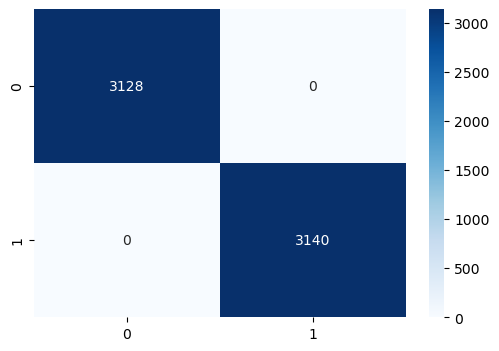

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show